### Prediction(dự đoán) of the class of new data points:

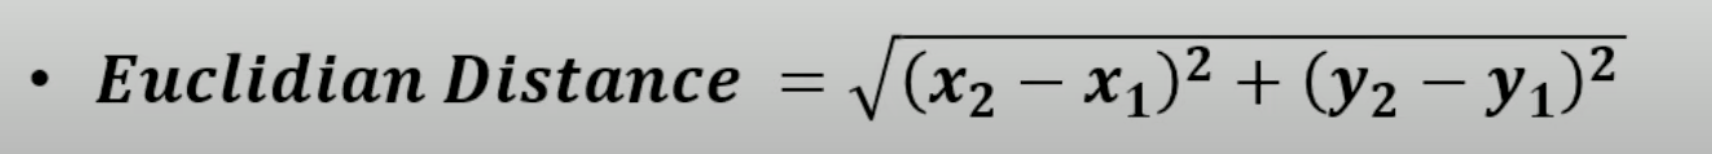

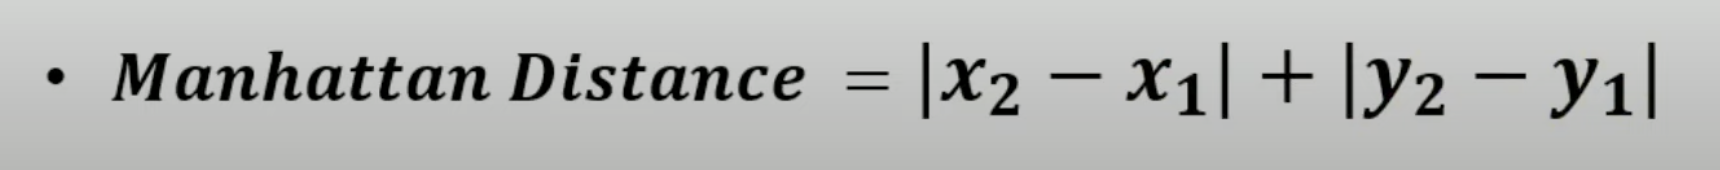

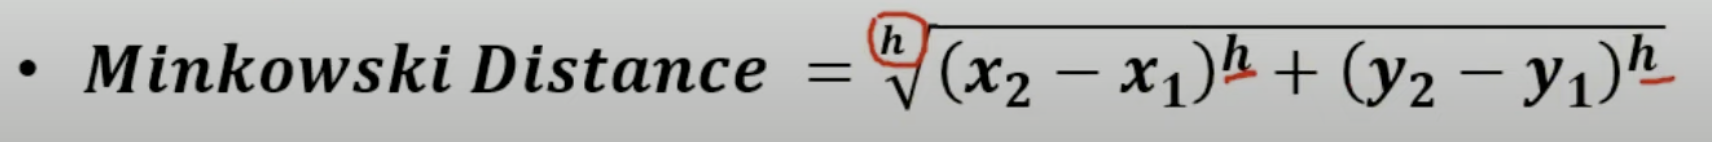

# Feature Scaling:
* Feature Scaling là một kỹ thuật chuẩn hóa các tính năng độc lập có trong dữ liệu trong một phạm vi cố định. Nó được thực hiện trong quá trình xử lý trước dữ liệu để xử lý các giá trị hoặc đơn vị có độ lớn thay đổi cao. Nếu feature scaling không được thực hiện, thì thuật toán học máy có xu hướng cân nhắc các giá trị lớn hơn, cao hơn và coi các giá trị nhỏ hơn là các giá trị thấp hơn, bất kể đơn vị của các giá trị.

### Absolute Maximum Scaling:
Phương pháp mở rộng quy mô này yêu cầu thực hiện hai bước sau:

1. Tìm giá trị nhỏ nhất và lớn nhất của cột.

2. Sau đó, trừ cho giá trị nhỏ nhất và chia kết quả cho hiệu số giữa giá trị lớn nhất và giá trị nhỏ nhất.
*
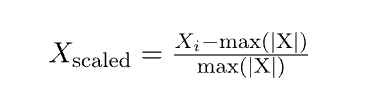
*Vì chúng ta sử dụng giá trị lớn nhất và nhỏ nhất nên phương pháp này cũng dễ xảy ra sai số nhưng phạm vi dữ liệu sẽ nằm trong khoảng từ 0 đến 1.*

In [2]:
import pandas as pd
df = pd.read_csv('/content/Sample File.csv')
print(df.head())


   LotArea  MSSubClass
0     8450          60
1     9600          20
2    11250          60
3     9550          70
4    14260          60


In [3]:
import numpy as np
# lấy giá trị tuyệt đối của max
max_vals = np.max(np.abs(df))
max_vals


215245

In [4]:
# áp dụng cthức
print((df - max_vals) / max_vals)

       LotArea  MSSubClass
0    -0.960742   -0.999721
1    -0.955400   -0.999907
2    -0.947734   -0.999721
3    -0.955632   -0.999675
4    -0.933750   -0.999721
...        ...         ...
1455 -0.963219   -0.999721
1456 -0.938791   -0.999907
1457 -0.957992   -0.999675
1458 -0.954856   -0.999907
1459 -0.953834   -0.999907

[1460 rows x 2 columns]


### Min-Max Scaling:
Phương pháp mở rộng quy mô này yêu cầu thực hiện hai bước sau:

1. Đầu tiên, chúng ta phải tìm giá trị nhỏ nhất và lớn nhất của cột.
2. Sau đó, chúng ta sẽ trừ giá trị nhỏ nhất khỏi mục nhập và chia kết quả cho hiệu số giữa giá trị lớn nhất và giá trị nhỏ nhất.
 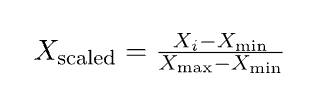

*Vì chúng ta sử dụng giá trị lớn nhất và nhỏ nhất nên phương pháp này cũng dễ xảy ra sai số nhưng phạm vi dữ liệu sẽ nằm trong khoảng từ 0 đến 1.*

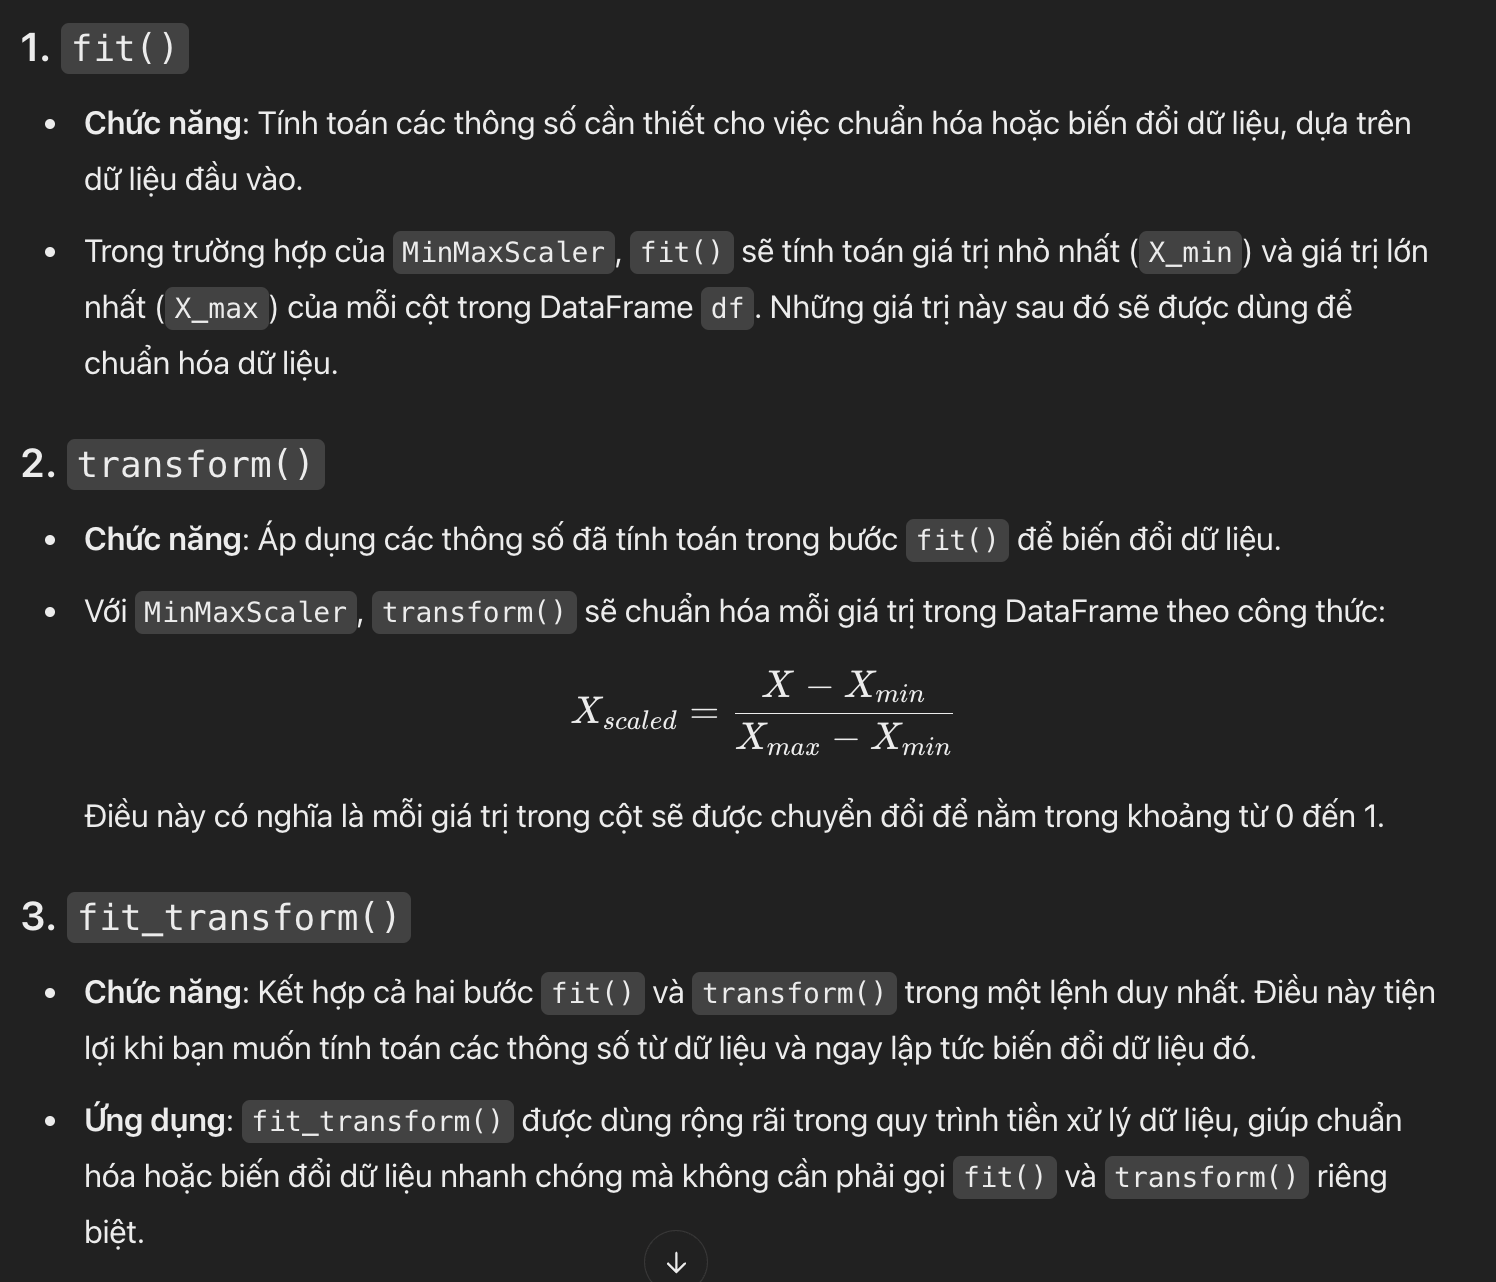

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Tạo 1 đối tượng MinMaxScaler. Bộ scaler này chuẩn hóa các giá trị của mỗi cột, sao cho chúng nằm trong khoảng [0, 1]
scaler = MinMaxScaler()
# giải thích bên trên
scaled_data = scaler.fit_transform(df)
# Chuyển mảng NumPy scaled_data về DataFrame với cùng tên cột như DataFrame ban đầu df
scaled_df = pd.DataFrame(scaled_data,
						columns=df.columns)
scaled_df.head()


,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294


### Normalization:
Phương pháp này về cơ bản giống với phương pháp trước nhưng thay vì **giá trị nhỏ nhất**, chúng ta trừ mỗi mục nhập cho **giá trị trung bình** của toàn bộ dữ liệu, sau đó chia kết quả cho hiệu số giữa giá trị nhỏ nhất và giá trị lớn nhất.

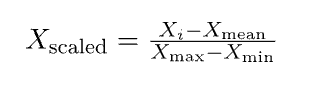

In [6]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
						columns=df.columns)
print(scaled_df.head())


    LotArea  MSSubClass
0  0.999975    0.007100
1  0.999998    0.002083
2  0.999986    0.005333
3  0.999973    0.007330
4  0.999991    0.004208


### Standardization:
Phương pháp mở rộng này về cơ bản dựa trên xu hướng trung tâm và phương sai của dữ liệu.

1. Đầu tiên, chúng ta phải tính giá trị trung bình và độ lệch chuẩn của dữ liệu mà chúng ta muốn chuẩn hóa.
2. Sau đó, chúng ta phải trừ giá trị trung bình của mỗi mục nhập rồi chia kết quả cho độ lệch chuẩn.

*Điều này giúp chúng ta đạt được phân phối chuẩn (nếu dữ liệu đã chuẩn nhưng bị lệch) với giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.*

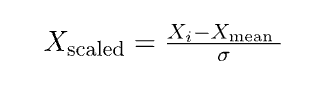

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
						columns=df.columns)
print(scaled_df.head())


    LotArea  MSSubClass
0 -0.207142    0.073375
1 -0.091886   -0.872563
2  0.073480    0.073375
3 -0.096897    0.309859
4  0.375148    0.073375


### Robust Scaling:
Trong phương pháp đo lường này, chúng tôi sử dụng hai biện pháp thống kê dữ liệu chính.

1. Trung vị ( sắp xếp các số đã cho theo thứ tự tăng dần hoặc giảm dần rồi lấy số ở giữa. Đó là trung vị )
2. Khoảng liên tứ phân vị (IQR = Q3 - Q1 (cthức chỉ lấy stt-> chuyển sang số theo stt sau khi sort ))

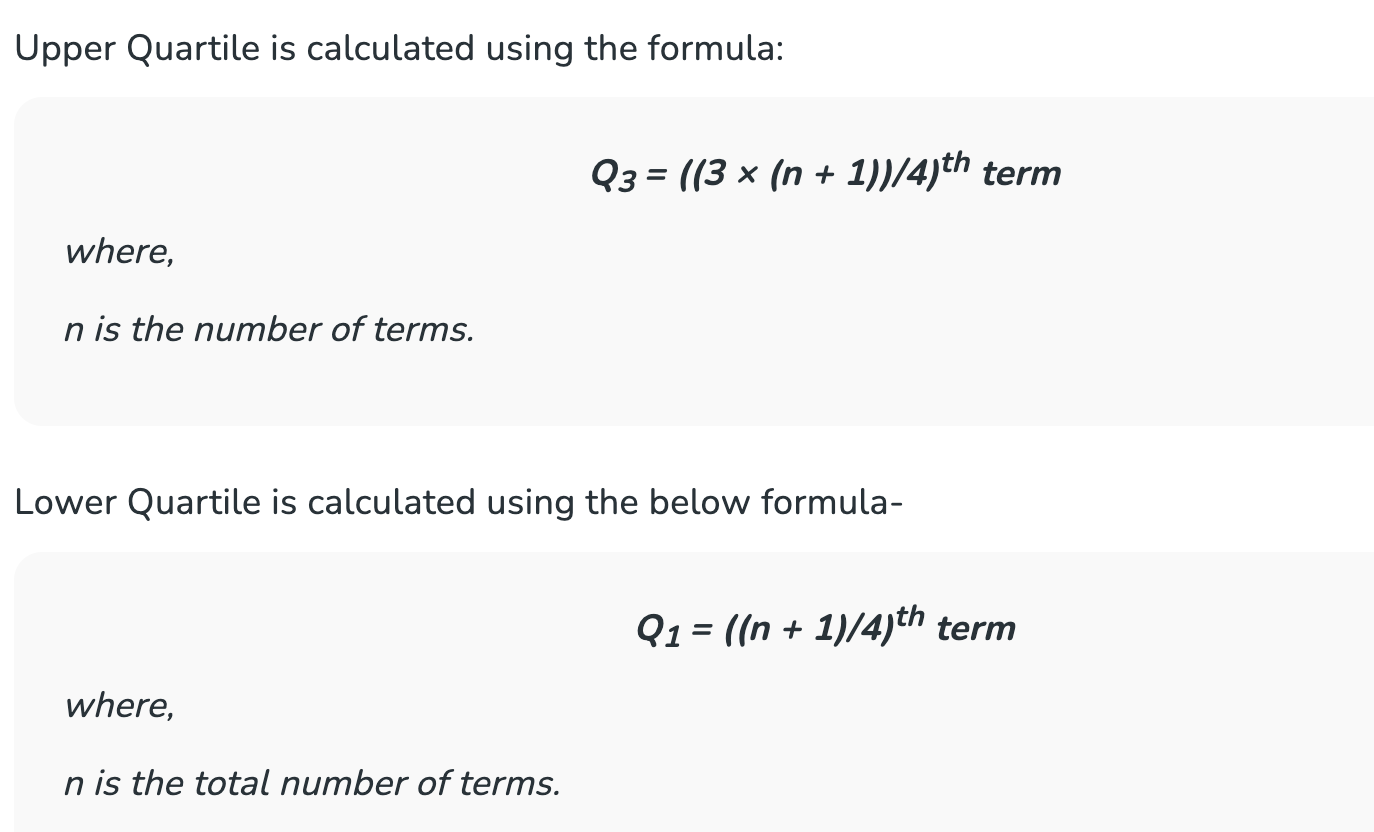

Sau khi tính toán hai giá trị này, chúng ta phải trừ trung vị khỏi mỗi mục nhập rồi chia kết quả cho khoảng tứ phân vị.

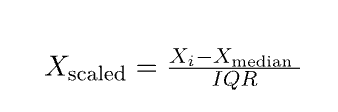



In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
						columns=df.columns)
print(scaled_df.head())


    LotArea  MSSubClass
0 -0.254076         0.2
1  0.030015        -0.6
2  0.437624         0.2
3  0.017663         0.4
4  1.181201         0.2
